# Import Pandas and Matplotlib libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from sklearn.linear_model import LinearRegression

# Read data from CSV file
cases = pd.read_csv('data/covid-19-cases.csv')
deaths = pd.read_csv('data/covid-19-deaths.csv')

# Covid data frame

In this code, we can have a look at the total Covid cases from the January 2020 to July 2021 comparing to the total number of deaths that caused by covid in the data frame.

The steps of visualizing the total number of cases and deaths by month are:
- Get the data from the columns that contains the required information in the covid-19-cases.csv and the covid-19-deaths.csv, which are columns with date and number of cases. 
- Since the matplotlib would count the sum by row, we need too transpose the columns and convert the first column to datetime format. The format is chosen by looking at the format in the csv file. 
- Calculate the sum of cases by column by each month and the corresponding year. But in this step, it only get the sum cases by each country, so we need to get the sum of the data along the row to get the final total number of cases. 
- Visualize the cases and the deaths by two columns in the table with blue for cases and red for deaths.

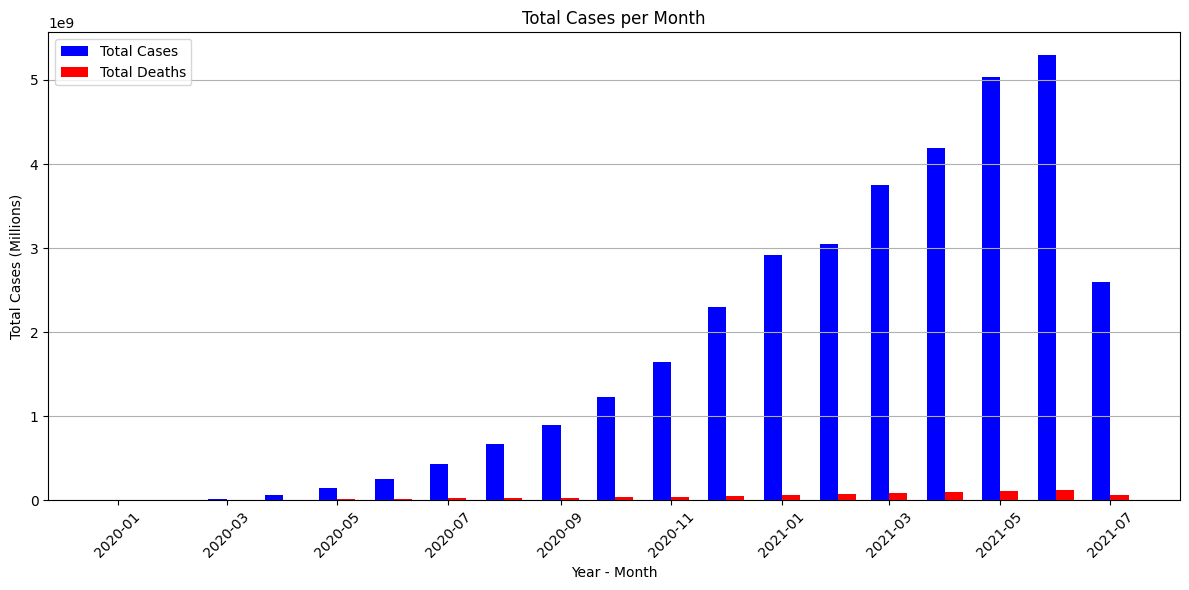

In [39]:
# Plot 1: Total cases and death by month with bar chart
# Get the data by date
cases_by_day = cases.iloc[:, 5:]
deaths_by_day = deaths.iloc[:, 5:]

# Transpose the data so that dates become columns
cases_by_day = cases_by_day.T
deaths_by_day = deaths_by_day.T

# Convert the first column to datetime
cases_by_day.index = pd.to_datetime(cases_by_day.index, format='%m/%d/%y')
deaths_by_day.index = pd.to_datetime(deaths_by_day.index, format='%m/%d/%y')

total_cases_per_month = cases_by_day.groupby([cases_by_day.index.year, cases_by_day.index.month]).sum().reset_index()
total_deaths_per_month = deaths_by_day.groupby([deaths_by_day.index.year, deaths_by_day.index.month]).sum().reset_index()

# Set the index to the year and month of the data
total_cases_per_month.index = pd.to_datetime({
    'year': total_cases_per_month['level_0'],
    'month': total_cases_per_month['level_1'],
    'day': 1
})

total_deaths_per_month.index = pd.to_datetime({
    'year': total_deaths_per_month['level_0'],
    'month': total_deaths_per_month['level_1'],
    'day': 1
})

# Calculate the total cases for each row
total_cases_per_month['Total Cases'] = total_cases_per_month.iloc[:, 3:].sum(axis=1)
total_deaths_per_month['Total Cases'] = total_deaths_per_month.iloc[:, 3:].sum(axis=1)


# Plotting
plt.figure(figsize=(12, 6))

# Define the width of each bar
bar_width = 10

# Plot total cases per month
plt.bar(total_cases_per_month.index - timedelta(days=bar_width/2), total_cases_per_month['Total Cases'], width=bar_width, label='Total Cases', color='blue')
plt.bar(total_deaths_per_month.index + timedelta(days=bar_width/2), total_deaths_per_month['Total Cases'], width=bar_width, label='Total Deaths', color='red')

# Set labels and title
plt.xlabel('Year - Month')
plt.ylabel('Total Cases (Millions)')
plt.title('Total Cases per Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(axis='y')

# Show legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


From the given diagram, it is visible that the number of total cases rocketed from April 2020 to June 2021 before dramatically decreases in July 2021. Despite such huge number of infected, the total number of deaths seems small comparing to the number of cases. But they both have the same trend in this period.
For better visualization, a line diagram is created with the following code, which is better at showing trends of both cases and deaths:

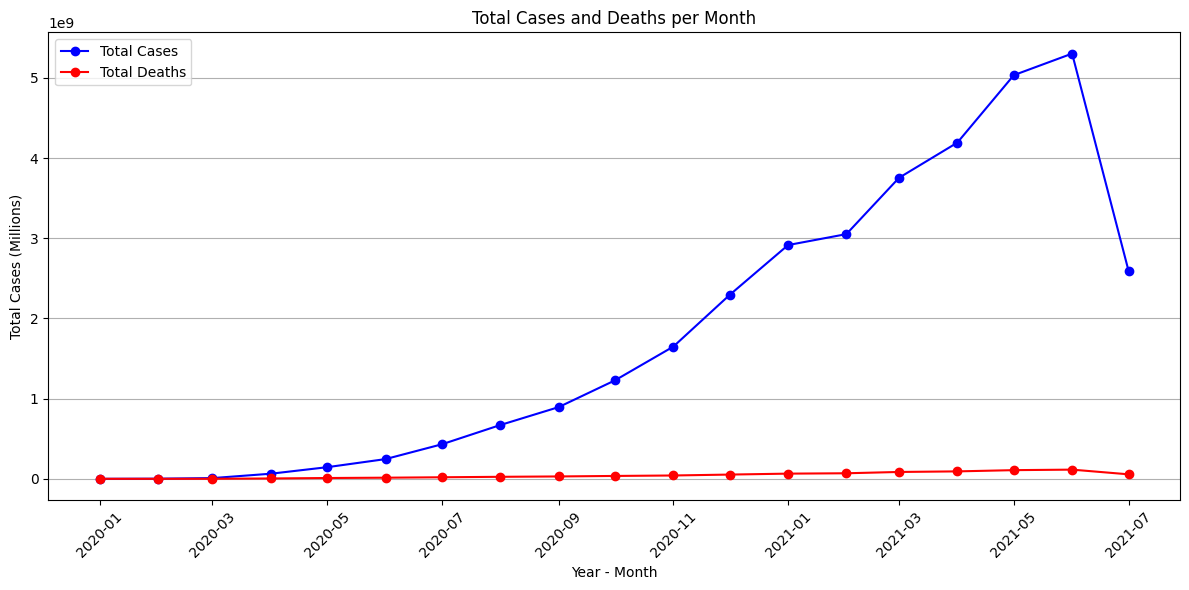

In [20]:
# Plot 2: Number of cases and deaths in line chart
# Plotting
plt.figure(figsize=(12, 6))

# Plot total cases per month with a line chart
plt.plot(total_cases_per_month.index, total_cases_per_month['Total Cases'], marker='o', linestyle='-', label='Total Cases', color='blue')
plt.plot(total_deaths_per_month.index, total_deaths_per_month['Total Cases'], marker='o', linestyle='-', label='Total Deaths', color='red')

# Set labels and title
plt.xlabel('Year - Month')
plt.ylabel('Total Cases (Millions)')
plt.title('Total Cases and Deaths per Month')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(axis='y')

# Show legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

By calculating the total cases by country and sort in order, we can retrieve the top 10 countries that has the highest number of total cases during the period. The code get the top 10 countries by the number of cases, and group the others in 'Other' group for plotting on the chart. In this section, a pie chart is used in order to present the portion of each countries in the total number of the world.

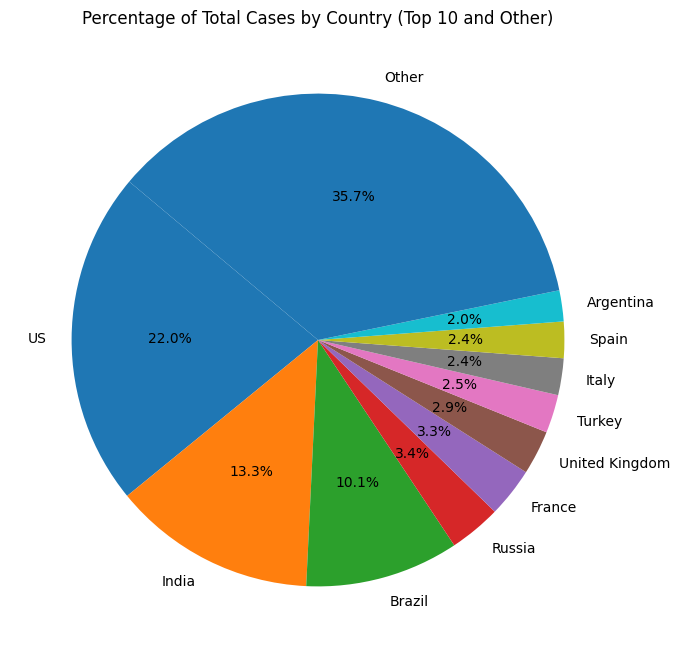

In [26]:
# Plot 3: Percentage of total cases by country
# Calculate total cases for each country
total_cases_by_country = cases.groupby('Country/Region').sum().iloc[:, 5:].sum(axis=1)

# Find the top 10 countries with the most cases
top_10_countries = total_cases_by_country.nlargest(10)

# Calculate total cases for other countries
other_countries_total_cases = total_cases_by_country[~total_cases_by_country.index.isin(top_10_countries.index)].sum()

# Create a new DataFrame with top 10 countries and 'Other' category
top_countries_df = pd.concat([top_10_countries, pd.Series({'Other': other_countries_total_cases})])

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries_df, labels=top_countries_df.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Cases by Country (Top 10 and Other)')
plt.show()

The line chart below is created by sorting the countries by keyword, which is Vietnam in this case.

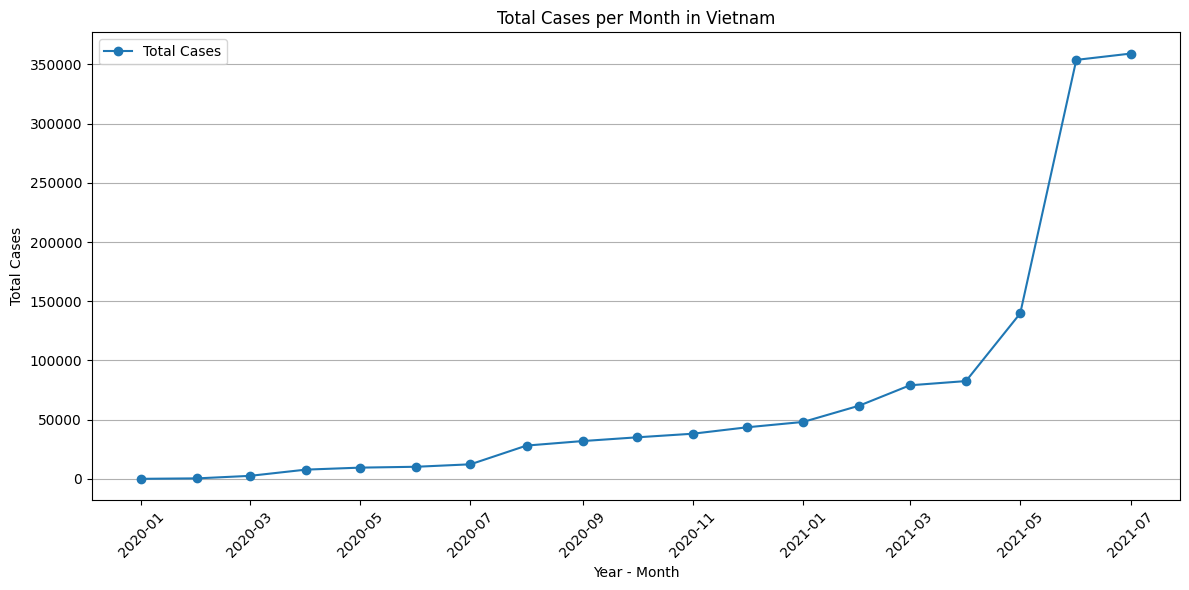

In [22]:
# Plot 4: Total cases by month in Vietnam
# Filter data for Vietnam
vietnam_data = cases[cases['Country/Region'] == 'Vietnam']

# Get the data by date
vietnam_cases_by_month = vietnam_data.iloc[:, 5:]

# Transpose the data so that dates become columns
vietnam_cases_by_month = vietnam_cases_by_month.T

# Convert the first column to datetime
vietnam_cases_by_month.index = pd.to_datetime(vietnam_cases_by_month.index, format='%m/%d/%y')

# Group by year and month and sum the cases
total_cases_per_month = vietnam_cases_by_month.groupby([vietnam_cases_by_month.index.year, vietnam_cases_by_month.index.month]).sum().reset_index()

# Set the index of total_cases_per_month to the year and month of the date_data
total_cases_per_month.index = pd.to_datetime({
    'year': total_cases_per_month['level_0'],
    'month': total_cases_per_month['level_1'],
    'day': 1
})

# Rename the sum column to Total Cases
total_cases_per_month.rename(columns={vietnam_cases_by_month.columns[0]: 'Total Cases'}, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

# Plot total cases per month with a line chart
plt.plot(total_cases_per_month.index, total_cases_per_month['Total Cases'], marker='o', linestyle='-', label='Total Cases')

# Set labels and title
plt.xlabel('Year - Month')
plt.ylabel('Total Cases')
plt.title('Total Cases per Month in Vietnam')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(axis='y')

# Show legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Weather Analysis data frame

In [4]:
# Read data from the csv file
weather = pd.read_csv('data/climate_data.csv', encoding="utf-8")

The code show the scatter plot of the average temperature and the average rainfall for month over the period between 2009 and 2020. The diagram reflect the relationship between the temperature and rainfall as there are more rain in hot climate than cooler condition.

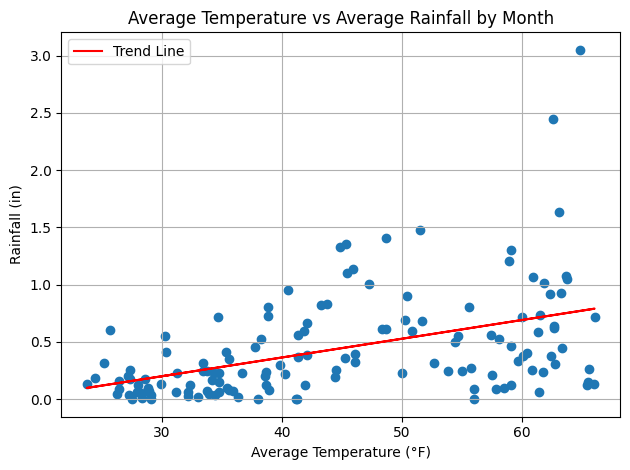

In [5]:
# Plot 5: Average Temperature vs Average rainfall by month
# Convert date format in the data
weather['Date'] = pd.to_datetime(weather['Date'])

# Extract month and year from 'Date'
weather['Month'] = weather['Date'].dt.month
weather['Year'] = weather['Date'].dt.year

# Group by month and calculate average temperature and rainfall for month
average_by_month = weather.groupby(['Month', 'Year'])[['Average temperature (°F)', 'Rainfall for month (in)']].mean().reset_index()

# Scatter plot
plt.scatter(average_by_month['Average temperature (°F)'], average_by_month['Rainfall for month (in)'])

# Fit linear regression
model = LinearRegression()
model.fit(average_by_month[['Average temperature (°F)']], average_by_month['Rainfall for month (in)'])
predictions = model.predict(average_by_month[['Average temperature (°F)']])

# Plot trend line
plt.plot(average_by_month['Average temperature (°F)'], predictions, color='red', label='Trend Line')

# Set labels and title
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Rainfall (in)')
plt.title('Average Temperature vs Average Rainfall by Month')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


We can take a look at a specific year of 2009, where we will demonstrate the correlation between the temperature and the rainfall in month

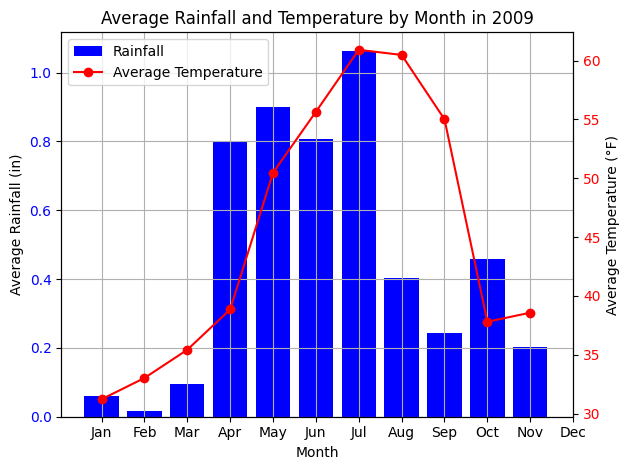

In [34]:
# Filter data for the year 2009
average_2009 = average_by_month.loc[average_by_month.index.get_level_values('Year') == 2009]

# Get the months and corresponding rainfall for 2009
months = average_2009.index.get_level_values('Month')
rainfall_2009 = average_2009['Rainfall for month (in)']
temperature_2009 = average_2009['Average temperature (°F)']

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot rainfall using bars on the primary y-axis
ax1.bar(months, rainfall_2009, color='blue', label='Rainfall')
ax1.set_ylabel('Average Rainfall (in)')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin Axes sharing the x-axis
ax2 = ax1.twinx()

# Plot average temperature using a line on the secondary y-axis
ax2.plot(months, temperature_2009, color='red', marker='o', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°F)')
ax2.tick_params(axis='y', labelcolor='red')

# Set labels and title
ax1.set_xlabel('Month')
ax1.set_title('Average Rainfall and Temperature by Month in 2009')

# Set x-ticks for all months
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show grid
ax1.grid(True)

# Show plot
plt.tight_layout()
plt.show()


# Data frame
https://www.kaggle.com/datasets/mastmustu/weather-analysis